# Biblioteca Shapely e Objetos geométricos 

**Fonte:**
este material é uma tradução e adaptação do notebook: <br/> https://github.com/Automating-GIS-processes/site/blob/master/source/notebooks/L1/geometric-objects.ipynb

## Modelo espacial de dados

![Spatial data model](images/SpatialDataModel.png)
*Objetos fundamentais que podem ser utilizados em python com a biblioteca* [Shapely](https://shapely.readthedocs.io/en/latest/project.html) 

Os objetos geométricos fundamentais para trabalhar com dados georeferenciados são: `Points`, `Lines` e `Polygons`. Em python podemos usar o módulo [Shapely](https://shapely.readthedocs.io/en/latest/project.html) para trabalhar com esses `Geometric Objects`. Entre algumas funcionalidades, podemos citar:

-  Criar uma `Line` ou `Polygon` de uma `Collection` de geometrias `Point`;
-  Calcular área, tamanho, limites e etc. dos objetos geométricos;
-  Realizar operações geométricas como: `Union`, `Difference`, `Distance` e etc;
-  Realizar consultas espaciais entre geometrias, como: `Intersects`, `Touches`, `Crosses`, `Within` e etc.

**Os objetos geométricos consistem em tuplas de coordenadas, em que:**

-  `Point`: representa um ponto no espaço. Podendo ser bidimensional (x, y) ou tridimensional (x, y, z);
-  `LineString`: representa uma sequência de pontos para formar uma linha. Uma linha consiste de pelo menos dois pontos.
-  `Polygon`: representa um polígono preenchido, formado por uma lista de pelo menos três pontos, que indicam uma estrutura de anel externo. Os polígonos também podem apresentar aberturas internas (buracos).

**Também é possível construir uma coleção de objetos geométricos, como:**

-  `MultiPoint`: representa uma coleção de `Point`;
-  `MultiLineString`: representa uma coleção de `LineString`;
-  `MultiPolygon`: representa uma coleção de `Polygon`.

É possível instalar o módulo Shapely em nosso ambiente através do comando:
*conda install shapely*

## 1. Objeto Point (Ponto)

Para criar um objeto `Point` é fácil, basta passar as coordenadas x e y para o objeto `Point()` (também é possível incluir a coordenada z):

In [5]:
# Import necessary geometric objects from shapely module
from shapely.geometry import Point, LineString, Polygon

# Create Point geometric object(s) with coordinates
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

Vamos ver como a variável do tipo `Point` é mostrada no jupyter:

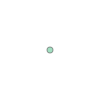

In [8]:
point1

Também podemos imprimir os pontos para ver a sua definição:

In [13]:
print(point1)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


 Pontos tridimensionais podem ser reconhecidos pela letra maiúscula Z.

Vamos verificar o tipo de dados da variável _point_:

In [11]:
# What is the type of the point?
print(type(point1))

<class 'shapely.geometry.point.Point'>


Podemos observar que o tipo do objeto ponto é um `Point` do módulo Shapely que é especificado em um formato baseado na biblioteca [GEOS](https://trac.osgeo.org/geos) do C++, que é um biblioteca padrão de GIS. Uma das bibliotecas utilizadas para construir por exemplo o [QGIS](http://www.qgis.org/en/site/).

### 1.1 Objeto Point - Atributos e funções

Os objetos do tipo `Point` já possuem atributos e funções internas para realizar operações básicas. Uma das funções mais úteis é a capacidade de extrair as coordenadas e a possibilidade de calcular a distância euclidiana entre dois pontos.

In [14]:
# Get the coordinates
point_coords = point1.coords

# What is the type of this?
type(point_coords)

shapely.coords.CoordinateSequence

Como pode ser observado o tipo de dado da variável `point_coords` é um Shapely CoordinateSequence.

Vamos ver como recuperar as coordenadas deste objeto:

In [16]:
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

# Print out
print("xy:", xy, "\n")
print("x:", x, "\n")
print("y:", y)

xy: (array('d', [2.2]), array('d', [4.2])) 

x: 2.2 

y: 4.2


Como podemos ver acima a variável `xy` contém uma tupla em que as coordendas x e y são armazendas em um array numpy.
Usando os atributos `point1.x` e `point1.y` é possível obter as coordendas diretamente como números decimais.

- Também é possível calcular a distância entre pontos, que é muito útil em diversas aplicações. A distância retornada é baseada na __projeção__ dos pontos (ex. graus em WGS84, metros em UTM):

Vamos calcular a distância entre o ponto 1 e o ponto 2:

In [17]:
# Calculate the distance between point1 and point2
point_dist = point1.distance(point2)

print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

Distance between the points is 29.72 decimal degrees


## 2. Objeto LineString (Linha)

Criar um objeto `LineString` é relativamente similar de como o objeto `Point` foi criado. 

Agora em vez de usar uma única tupla de coordenadas, nós podemos contruir uma _linha_ usando uma lista de `Point` ou um vetor de tuplas com as respectivas coordenadas:

In [18]:
# Create a LineString from our Point objects
line = LineString([point1, point2, point3])

# It is also possible to produce the same outcome using coordinate tuples
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

Vamos ver como a variável do tipo `LineString` é mostrada no jupyter:

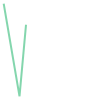

In [19]:
# Visualize the line
line

In [21]:
print("line: \n", line, "\n")
print("line2: \n", line2, "\n")

line: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 

line2: 
 LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456) 



Como podemos ver acima, a variável _line_ constitue um multiplo par de coordenadas.

Vamos verificar o tipo de dados da variável _line_:

In [23]:
print("Object data type:", type(line))
print("Geometry type as text:", line.geom_type)

Object data type: <class 'shapely.geometry.linestring.LineString'>
Geometry type as text: LineString


### 2.1 Objeto LineString - Atributos e funções

O objeto `LineString` possui diversos atributos e funções internas. Com ele é possível extrair as coordenadas ou o tamanho da linha, calcular o centróide, criar pontos ao longo da linha em distâncias específicas, calcular a menor distância da linha para um ponto específico e etc. A lista completa de funcionalidades pode ser acessada na documentação: [Shapely documentation](https://shapely.readthedocs.io/en/latest/manual.html#linestrings). Vamos utilizar algumas delas.

Nós podemos extrair as coordenadas da `LineString` similar a ao objeto `Point`

In [24]:
# Get x and y coordinates of the line
lxy = line.xy

print(lxy)

(array('d', [2.2, 7.2, 9.26]), array('d', [4.2, -25.1, -2.456]))


Como podemos observar, as coordenadas novamente são armazenadas em arrays numpy, em que o primeiro array inclui todas as coordenadas x e o segundo array todas as coordendas y.

Podemos extrair somente as coordendas x e y das seguintes formas.

In [13]:
# Extract x coordinates
line_x = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
line_y = line.xy[1]

print('line_x:\n', line_x, '\n')

print('line_y:\n', line_y)

line_x:
 array('d', [2.2, 7.2, 9.26]) 

line_y:
 array('d', [4.2, -25.1, -2.456])


É possível recuperar atributos específicos, como o tamanho da linha e o ponto central (centróide) diretamente do objeto:

In [25]:
# Get the lenght of the line
l_length = line.length

# Get the centroid of the line
l_centroid = line.centroid

# What type is the centroid?
centroid_type = type(l_centroid)

# Print the outputs
print("Length of our line: {0:.2f}".format(l_length))
print("Centroid of our line: ", l_centroid)
print("Type of the centroid:", centroid_type)

Length of our line: 52.46
Centroid of our line:  POINT (6.229961354035622 -11.89241115757239)
Type of the centroid: <class 'shapely.geometry.point.Point'>


Com estas informações, já podemos realizar muitas tarefas construindo aplicações em mapas, e ainda não calculamos nada ainda. Estes atributos estão embutidos em todos os objetos `LineString` que são criados.

É importante perceber que o centróide retornado no exemplo acima é um objeto `Point`, que possui suas próprias funções já mencionadas anteriormente.

## 3. Objeto Polygon (Polígono)

Para criar um objeto `Polygon` usaremos a mesma lógica do `Point` e `LineString`, porém na criação do objeto `Polygon` só podemos utilizar uma sequência de coordendas.

Para criar um polígono são necessários __pelo menos três coordendas__ (que basicamente formam um triângulo).

In [26]:
# Create a Polygon from the coordinates
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])

Vamos ver como a variável do tipo `Polygon` é mostrada no jupyter:

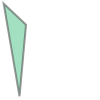

In [27]:
poly2

In [28]:
print('poly:', poly)
print('poly2:', poly2)

poly: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))
poly2: POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


Vamos verificar o tipo de dados da variável _polygon_:

In [32]:
print("Object data type:", type(poly))
print("Geometry type as text:", poly.geom_type)

Object data type: <class 'shapely.geometry.polygon.Polygon'>
Geometry type as text: Polygon


Perceba que a representação do `Polygon` possui dois parentesis ao redor das coordendas (ex.: `POLYGON ((<valores>))` ). Isso acontece porque o objeto `Polygon` pode ter aberturas (buracos) dentro dele. 

Como é mostrado na documentação do `Polygon` (utilizando a função help do python) um polígono pode ser construído usando as coordendas exteriores e coordendas interiores (opcionais), em que as coordendas interiores criam um buraco dentro do polígono. 

In [29]:
# # Help function to show the documentation of Shapely's Polygon
# help(Polygon)

```
Help on Polygon in module shapely.geometry.polygon object:
     class Polygon(shapely.geometry.base.BaseGeometry)
      |  A two-dimensional figure bounded by a linear ring
      |
      |  A polygon has a non-zero area. It may have one or more negative-space
      |  "holes" which are also bounded by linear rings. If any rings cross each
      |  other, the feature is invalid and operations on it may fail.
      |
      |  Attributes
      |  ----------
      |  exterior : LinearRing
      |      The ring which bounds the positive space of the polygon.
      |  interiors : sequence
      |      A sequence of rings which bound all existing holes.
      
```

Vamos ver como podemos criar um `Polygon` com um buraco interno. Primeiro vamos definir um _bounding box_ (caixa delimitadora) e depois criar um buraco na parte interna.

In [41]:
# First we define our exterior
poly_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the polygon
# Notice: there could be multiple holes, thus we need to provide a list of holes
hole = [[(-100, 50), (-100, -50), (100, -50), (100, 50)]]

# Plygon without a hole
poly = Polygon(shell=poly_exterior)

# Now we can construct our Polygon with the hole inside
poly_has_a_hole = Polygon(shell=poly_exterior, holes=hole)

Vamos ver como a variável o nosso `Polygon` é mostrado no jupyter:

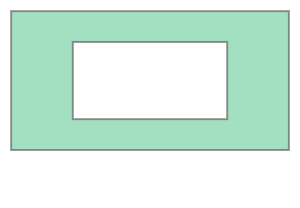

In [42]:
poly_has_a_hole

In [43]:
print('poly:', poly)
print('poly_has_a_hole:', poly_has_a_hole)
print('type:', type(poly_has_a_hole))

poly: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))
poly_has_a_hole: POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-100 50, -100 -50, 100 -50, 100 50, -100 50))
type: <class 'shapely.geometry.polygon.Polygon'>


Como podemos observar, o `Polygon` agora possui duas tuplas diferentes de coordendas. A primeira representa o **exterior** e a segunda representa o **buraco** presente no interior do polígono.

### 3.1 Objeto Polygon - Atributos e funções

Podemos novamente acessar diferentes atributos diretamente do objeto `Polygon`, que podem ser bastante úteis para muitas análises, como: obter área, centróide, _bounding box_, o exterior e o perímetro (tamanho exterior).

Aqui, podemos ver algunas atributos disponíveis e como acessá-los:

In [45]:
# Get the centroid of the Polygon
poly_centroid = poly.centroid

# Get the area of the Polygon
poly_area = poly.area

# Get the bounds of the Polygon (i.e. bounding box)
poly_bbox = poly.bounds

# Get the exterior of the Polygon
poly_ext = poly.exterior

# Get the length of the exterior
poly_ext_length = poly_ext.length

# Print the outputs
print("Poly centroid: ", poly_centroid)
print("Poly Area: ", poly_area)
print("Poly Bounding Box: ", poly_bbox)
print("Poly Exterior: ", poly_ext)
print("Poly Exterior Length: ", poly_ext_length)

Poly centroid:  POINT (-0 -0)
Poly Area:  64800.0
Poly Bounding Box:  (-180.0, -90.0, 180.0, 90.0)
Poly Exterior:  LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)
Poly Exterior Length:  1080.0


Como podemos ver acima, de maneira direta podemos acessar diferentes atributos do objeto `Polygon`. Porém perceba  que o tamanho do perímetro exterior foi obtido em graus decimais, porque estamos utilizando coordendas de latitude e longitude na entrada do nosso polígono. Posteriormente vamos aprender a mudar a projeção desses dados e ser capaz de obter as mesmas informações em metros.

## 4. Coleção de geometrias (opcional)

Em algumas ocasiões é necessário armazenar multiplas linhas ou polígonos em um único objeto (ex: uma geometria que representa vários polígonos). Estas coleções são implementadas através dos objetos:

-  `MultiPoint`: representa uma coleção de `Point`;
-  `MultiLineString`: representa uma coleção de `LineString`;
-  `MultiPolygon`: representa uma coleção de `Polygon`.

Estas coleções não são computacionalmente significantes, mas são úteis para modelar certos tipos de _features_. Por exemplo, uma rua em formato de Y utilizando `MultiLineString`, um conjunto de ilhas em um arquipélago com  `MultiPolygon`.

Criar e visualizar um [bounding box](https://en.wikipedia.org/wiki/Minimum_bounding_box) minímo ao redor dos seus dados de pontos é uma função útil para muitos propósitos (ex: tentar entender a extensão dos seus dados), em seguida veremos como é possível realizar esta operação.

In [46]:
# Import collections of geometric objects + bounding box
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])

# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])
line2 = LineString([point2, point3])
multi_line = MultiLineString([line1, line2])

# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------

# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]

# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s). 
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

# Create the Polygon
west_poly = Polygon(shell=west_exterior, holes=west_hole)

# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
min_x, min_y = 0, -90
max_x, max_y = 180, 90

# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)

# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])

# Print outputs
print("MultiPoint:", multi_point)
print("MultiLine: ", multi_line)
print("Bounding box: ", east_poly_box)
print("MultiPoly: ", multi_poly)


MultiPoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)
MultiLine:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (7.2 -25.1, 9.26 -2.456))
Bounding box:  POLYGON ((180 -90, 180 90, 0 90, 0 -90, 180 -90))
MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


Vamos ver como as nossas coleções de geometrias são mostradas no jupyter:

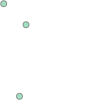

In [54]:
multi_point

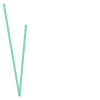

In [55]:
multi_line

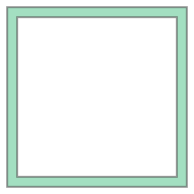

In [56]:
west_poly

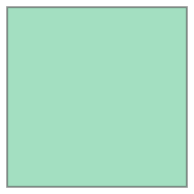

In [57]:
east_poly_box

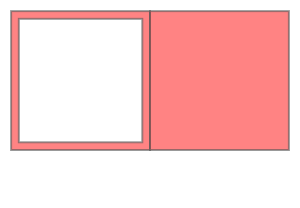

In [58]:
multi_poly

Podemos observar que as saídas são similares as geometrias básicas que foram criadas anteriormente, más agora esses objetos são extensíveis para multiplos pontos, linhas e polígonos.

### 4.1 Coleção de geometrias -  Atributos e funções

Podemos também utilizar muitas funções internas especificas destas coleções, como o `Convex Hull`

Utilizando a nossa estrutura anterior de três pontos:

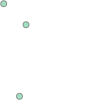

In [62]:
multi_point

Vamos chamar a função interna `Convex Hull`

In [65]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull

Convex hull of the points:  POLYGON ((7.2 -25.1, 2.2 4.2, 9.26 -2.456, 7.2 -25.1))


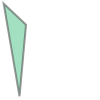

In [66]:
print("Convex hull of the points: ", convex)
convex

Outros atributos internos da coleção de geometria:

In [68]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)

# Print output:
print("Number of lines in MultiLineString:", lines_count)

Number of lines in MultiLineString: 2


In [70]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area

Também podemos acessar diferentes itens dentro de nossas coleções de geometria. Podemos, por exemplo, acessar um único polígono de nosso objeto `MultiPolygon`, referindo-se ao índice:

In [71]:
# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area

# Print outputs:
print("Area of our MultiPolygon:", multi_poly_area)
print("Area of our Western Hemisphere polygon:", west_area)

Area of our MultiPolygon: 39200.0
Area of our Western Hemisphere polygon: 6800.0


Como mostrado acima podemos ver que o objeto `MultiPolygon` possui os mesmos atributos que o objeto `Polygon`, mas agora métodos como cálculo da área retorna a soma das áreas de **todos** os polígonos presentes no objeto.

Também existem algumas funções extras disponíveis apenas para estas coleções, como **is_valid** que retorna se o polígono ou linhas possuem interseção um com o outro.

In [72]:
valid = multi_poly.is_valid
print("Is polygon valid?: ", valid)

Is polygon valid?:  False
